**Libraries**

In [1]:
import pandas as pd
import numpy as np

import warnings

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import joypy #el de las densidades guays

from sklearn import manifold  


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import os 
cwd = os.getcwd() + "/"
cwd="/home/angela/Notebook/machine_learning/normalizados/NN_simple_param/"
from sklearn import metrics

from sklearn.neural_network import MLPClassifier


warnings.filterwarnings('ignore') #ATENCION QUE ESTO CREO QUE FUNCIONA PARA TODO EL NOTEBOOK

import random
random.seed(1)
np.random.seed(1)
np.random.RandomState(1)

from sklearn.preprocessing import MinMaxScaler

from IPython.display import display




**LOAD**

In [2]:
#ALL THE DATASET

df=pd.read_pickle("/home/angela/Notebook/data/normalizados/trainpickle")
df_originaltest=pd.read_pickle("/home/angela/Notebook/data/normalizados/testpickle")

In [3]:
#SIMPLe DATASET
#df=pd.read_pickle("/home/angela/Notebook/data/normalizados/trainsimplepickle")
#df_originaltest=pd.read_pickle("/home/angela/Notebook/data/normalizados/testsimplepickle")


# Machine learning

**We will follow the scikit-learn schema to train and validate the model**


https://scikit-learn.org/stable/modules/cross_validation.html


## SVM

In [4]:
#Scores


def Scores(y_true,y_pred):
    
    tn, fp, fn, tp = metrics.confusion_matrix(y_true, y_pred).ravel()
    prec=tp / (tp + fp)
    recall= tp / (tp + fn)
    F1_score= 2 * (prec * recall) / (prec + recall)
    acc=metrics.accuracy_score(y_true,y_pred)
    kappa_cohen=metrics.cohen_kappa_score(y_true,y_pred)
        
    return(tn, fp, fn, tp, acc, prec,recall, F1_score,kappa_cohen)


def model(X_train,y_train,X_test):
    
    scaler = MinMaxScaler()
    scaler=scaler.fit(X_train)
    
    
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    
    model = MLPClassifier() 
    
    #grid search, copy of kaggle: https://www.kaggle.com/hatone/mlpclassifier-with-gridsearchcv#L72
    #defalult (scikit learn) :  best_model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2)))

    #params = {'solver': ['lbfgs'], 'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0,1,2,3,4,5,6,7,8,9]}    #model = SVC(probability=True) 
    #reduced: 
    #params = {'solver': ['lbfgs','adam', 'sgd'], 'max_iter': [200,600,1000,1400,1800], 'alpha': 10.0 ** -np.arange(4, 6), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0]}    #model = SVC(probability=True) 
 
    params = {'solver': ['lbfgs'], 'max_iter': [1000,1500,2000], 'alpha': [10.0 ** -5,10.0 ** -4], 'hidden_layer_sizes':[15,25,35,50], 'random_state':[0],
             'learning_rate':['constant'],'activation':[ 'tanh']}
             #he pprobado y el solver sale siepre mejor lgbs
            #he pprobado y el learning_rate sale siepre mejor constant
            #he pprobado y el learning_rate sale siepre mejor tanh


        
        #'learning_rate':['constant', 'invscaling', 'adaptive'],'activation':['identity', 'logistic', 'tanh', 'relu']}    


    grid = GridSearchCV(estimator=model, param_grid=params,cv=5,verbose=1, n_jobs=-1)

    grid.fit(X_train,y_train)
    best_model = grid.best_estimator_
    
    best_model.fit(X_train,y_train)
    # Predict test set labels
    y_pred = best_model.predict(X_test)    
    y_pred_proba = best_model.predict_proba(X_test)[::,1] #Neccesary to make the ROC curve 

    return(grid,best_model,y_pred,y_pred_proba)

mass= 500
train mass   0.0    500.0
label              
0      50168      0
1          0  49832
test mass     0      500
label              
0      24949      0
1          0  25051
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 123.1min finished


MLPClassifier(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=35, learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


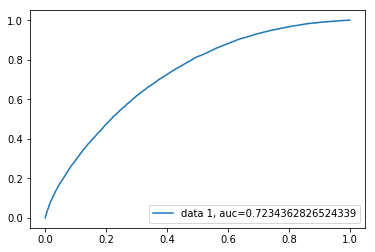

mass= 750
train mass   0.0    750.0
label              
0      49776      0
1          0  50224
test mass     0      750
label              
0      24826      0
1          0  25174
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 121.8min finished


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=35, learning_rate='constant',
       learning_rate_init=0.001, max_iter=1500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


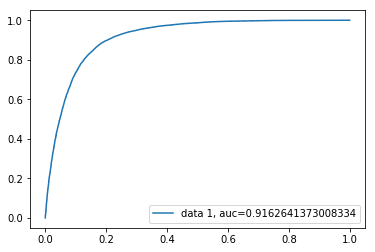

mass= 1000
train mass   0.0     1000.0
label                
0       50061       0
1           0   49939
test mass    0      1000
label              
0      25131      0
1          0  24869
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 103.3min finished


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=35, learning_rate='constant',
       learning_rate_init=0.001, max_iter=1500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


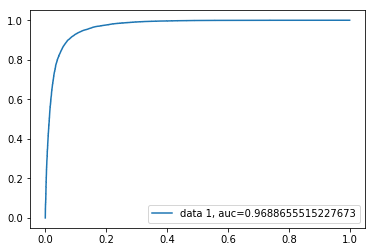

mass= 1250
train mass   0.0     1250.0
label                
0       50002       0
1           0   49998
test mass    0      1250
label              
0      25061      0
1          0  24939
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 63.7min finished


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=35, learning_rate='constant',
       learning_rate_init=0.001, max_iter=1500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


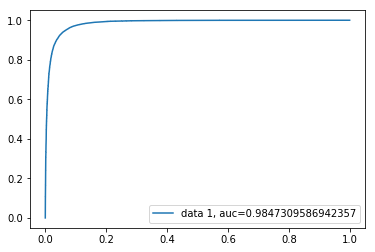

mass= 1500
train mass   0.0     1500.0
label                
0       50149       0
1           0   49851
test mass    0      1500
label              
0      25050      0
1          0  24950
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 56.8min finished


MLPClassifier(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=15, learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


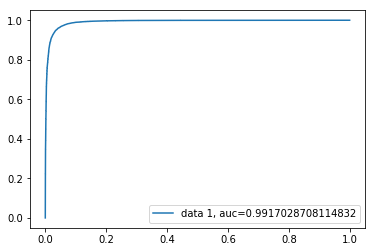

X_train_shape (100000, 11)
X_test_shape (50000, 11)


,tn,fp,fn,tp,acc,prec,recall,F1_score,kappa_cohen,auc
500,15299,9650,7179,17872,0.66342,0.649371,0.713425,0.679893,0.326701,0.723436
750,20258,4568,2929,22245,0.85006,0.829635,0.88365,0.855791,0.699969,0.916264
1000,22685,2446,1806,23063,0.91496,0.904112,0.927379,0.915598,0.829938,0.968866
1250,23335,1726,1210,23729,0.94128,0.932194,0.951482,0.941739,0.882565,0.984731
1500,23813,1237,841,24109,0.95844,0.951195,0.966293,0.958685,0.916882,0.991703


<Figure size 432x288 with 0 Axes>

In [5]:
#Metric df: 
df_metrics =  pd.DataFrame(index=[500,750,1000,1250,1500], columns=["tn", "fp", "fn", "tp", "acc", "prec","recall","F1_score","kappa_cohen","auc"])



for i in (500,750,1000,1250,1500):
#for i in (1250,1500):

    print('mass=', i )

    #train
      #0 same size of dfmass1000 #TENER EN CUENTA QUE AQUI QUE LA DE 0 SEA MAYOR SIZE ES CASUALIDAD
    #EN OTRO PICKE PODRIA SER AL REVES, ESTO SE DEBERIA DE ARREGLAR
    np.random.seed(1)
    #dfmass0['mass'] = np.random.choice([500,750,1000,1250,1500], dfmass0.shape[0])#las cambio para queno sean 0 porque entonces sabría el label
    dfmass1000=df.loc[df['mass'] ==i]        
    dfmass0=df.loc[df['mass'] == 0].sample(random_state=1,n=dfmass1000.shape[0])   #cojo todos!!!!!!!!!!!!!! 
    dfmass1000=pd.concat([dfmass1000, dfmass0]).sample(random_state=1,frac=1).reset_index(drop=True)    #concatenating and shuffling
    dfmass1000['mass']=dfmass1000['mass'].astype(float)
    dfmass1000=dfmass1000.sample(random_state=1,n=20000*5)
    print("train", pd.crosstab(dfmass1000['label'],dfmass1000['mass']))
    dfmass1000=dfmass1000.drop('mass', axis=1)        #la masa es una caracterísitca
    
    
    #test
    dfmass1000test=df_originaltest.loc[df_originaltest['mass'] == i]
    dfmass0test=df_originaltest.loc[df_originaltest['mass'] == 0].sample(random_state=1,n=dfmass1000test.shape[0])
    dfmass1000test=pd.concat([dfmass1000test, dfmass0test]).sample(frac=1).reset_index(drop=True)
    dfmass1000test=dfmass1000test.sample(random_state=1,n=10000*5)

    print("test", pd.crosstab(dfmass1000test['label'],dfmass1000test['mass']))  
    
    dfmass1000test=dfmass1000test.drop('mass', axis=1)  
    
    

    drop=['lep_eta', 'lep_phi',  'met_phi', 'jets_no', 'jet1_eta', 'jet1_phi', 'jet1_btag', 
       'jet2_eta', 'jet2_phi', 'jet2_btag',  'jet3_eta', 'jet3_phi',
       'jet3_btag', 'jet4_eta', 'jet4_phi', 'jet4_btag']

    X_train=dfmass1000.drop(['label'], axis=1)
    X_train=X_train.drop(drop, axis=1)
    y_train=dfmass1000.label
    
    X_test=dfmass1000test.drop(['label'], axis=1)
    X_test=X_test.drop(drop, axis=1)
    y_test=dfmass1000test.label
        
   # print(X_train)
   # print(y_test)

    grid,best_model,y_pred,y_pred_proba = model(X_train,y_train,X_test)
    print(best_model)

#Roc curve construction

    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    #plt.savefig(cwd2+'MASS=' + str(i) + 'ROC.png')
    plt.show()
    plt.clf() 

#METRICS 

    tn, fp, fn, tp, acc, prec,recall, F1_score,kappa_cohen=Scores(y_test,y_pred)

    df_metrics.tn[i]=tn
    df_metrics.fp[i]=fp
    df_metrics.fn[i]=fn
    df_metrics.tp[i]=tp
    df_metrics.acc[i]=acc
    df_metrics.prec[i]=prec
    df_metrics.recall[i]=recall
    df_metrics.F1_score[i]=F1_score
    df_metrics.kappa_cohen[i]=kappa_cohen
    df_metrics.auc[i]=auc
    
    df_metrics.to_pickle('df_metrics')


print("X_train_shape",X_train.shape)
print("X_test_shape",X_test.shape)


display(df_metrics)

In [6]:
df_metrics

,tn,fp,fn,tp,acc,prec,recall,F1_score,kappa_cohen,auc
500,15299,9650,7179,17872,0.66342,0.649371,0.713425,0.679893,0.326701,0.723436
750,20258,4568,2929,22245,0.85006,0.829635,0.88365,0.855791,0.699969,0.916264
1000,22685,2446,1806,23063,0.91496,0.904112,0.927379,0.915598,0.829938,0.968866
1250,23335,1726,1210,23729,0.94128,0.932194,0.951482,0.941739,0.882565,0.984731
1500,23813,1237,841,24109,0.95844,0.951195,0.966293,0.958685,0.916882,0.991703


In [7]:
df_metrics.to_pickle('g2')

In [8]:
print(X_train.shape)
print(X_test.shape)
y_test.value_counts()

(100000, 11)
(50000, 11)


0    25050
1    24950
Name: label, dtype: int64

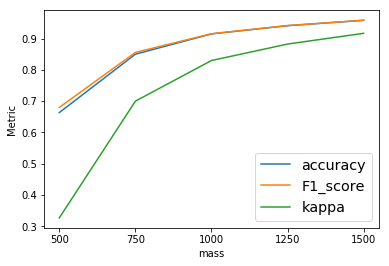

<Figure size 432x288 with 0 Axes>

In [9]:
fig, ax = plt.subplots()
ax.plot(["500","750","1000","1250","1500"], df_metrics["acc"], label="accuracy")
ax.plot(["500","750","1000","1250","1500"], df_metrics["F1_score"], label="F1_score")
ax.plot(["500","750","1000","1250","1500"], df_metrics["kappa_cohen"], label="kappa")

ax.set_xlabel('mass')
ax.set_ylabel('Metric')
legend = ax.legend(fontsize='x-large')
plt.show()
plt.savefig(cwd+ 'metrics_comparation.png')

# Entrenando con todas las masas

In [10]:
#Metric df: 
df_metrics =  pd.DataFrame(index=[500,750,1000,1250,1500], columns=["tn", "fp", "fn", "tp", "acc", "prec","recall","F1_score","kappa_cohen","auc"])


for i in (500,750,1000,1250,1500):

    print('mass=', i )

    #train
      #0 same size of dfmass1000 #TENER EN CUENTA QUE AQUI QUE LA DE 0 SEA MAYOR SIZE ES CASUALIDAD
    #EN OTRO PICKE PODRIA SER AL REVES, ESTO SE DEBERIA DE ARREGLAR
    np.random.seed(1)
    #dfmass0['mass'] = np.random.choice([500,750,1000,1250,1500], dfmass0.shape[0])#las cambio para queno sean 0 porque entonces sabría el label
    dfmass0=df.loc[df['mass'] == 0]
    dfmass1000=df.loc[df['mass'] !=0].sample(random_state=1,n=dfmass0.shape[0])      
    
    dfmass1000=pd.concat([dfmass1000, dfmass0]).sample(random_state=1,frac=1).reset_index(drop=True)    #concatenating and shuffling
    dfmass1000['mass']=dfmass1000['mass'].astype(float)
    dfmass1000=dfmass1000.sample(random_state=1,n=20000*5)
    print("train", pd.crosstab(dfmass1000['label'],dfmass1000['mass']))
    dfmass1000=dfmass1000.drop('mass', axis=1)        #la masa es una caracterísitca
    
    
    #test
    dfmass1000test=df_originaltest.loc[df_originaltest['mass'] == i]
    dfmass0test=df_originaltest.loc[df_originaltest['mass'] == 0].sample(random_state=1,n=dfmass1000test.shape[0])
    dfmass1000test=pd.concat([dfmass1000test, dfmass0test]).sample(frac=1).reset_index(drop=True)
    dfmass1000test=dfmass1000test.sample(random_state=1,n=10000*5)

    print("test", pd.crosstab(dfmass1000test['label'],dfmass1000test['mass']))  
    
    dfmass1000test=dfmass1000test.drop('mass', axis=1)  
    

    X_train=dfmass1000.drop(['label'], axis=1)
    y_train=dfmass1000.label
    
    X_test=dfmass1000test.drop(['label'], axis=1)
    y_test=dfmass1000test.label
        
    grid,best_model,y_pred,y_pred_proba = model(X_train,y_train,X_test)
    print(best_model)


#Roc curve construction

    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    #plt.savefig(cwd2+'MASS=' + str(i) + 'ROC.png')
    plt.show()
    plt.clf() 

#METRICS 
    tn, fp, fn, tp, acc, prec,recall, F1_score,kappa_cohen=Scores(y_test,y_pred)

    df_metrics.tn[i]=tn
    df_metrics.fp[i]=fp
    df_metrics.fn[i]=fn
    df_metrics.tp[i]=tp
    df_metrics.acc[i]=acc
    df_metrics.prec[i]=prec
    df_metrics.recall[i]=recall
    df_metrics.F1_score[i]=F1_score
    df_metrics.kappa_cohen[i]=kappa_cohen
    df_metrics.auc[i]=auc


print("X_train_shape",X_train.shape)
print("X_test_shape",X_test.shape)

display(df_metrics)

mass= 500
train mass   0.0     500.0   750.0   1000.0  1250.0  1500.0
label                                                
0       49825       0       0       0       0       0
1           0   10002   10045   10199    9912   10017
test mass     0      500
label              
0      24949      0
1          0  25051
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed: 17.8min


KeyboardInterrupt: 

In [ ]:
print(X_train.shape)
print(X_test.shape)
y_test.value_counts()

In [ ]:
fig, ax = plt.subplots()
ax.plot(["500","750","1000","1250","1500"], df_metrics["acc"], label="accuracy")
ax.plot(["500","750","1000","1250","1500"], df_metrics["F1_score"], label="F1_score")
ax.plot(["500","750","1000","1250","1500"], df_metrics["kappa_cohen"], label="kappa")

ax.set_xlabel('mass')
ax.set_ylabel('Metric')
legend = ax.legend(fontsize='x-large')
plt.show()
plt.savefig(cwd+ 'metrics_comparation.png')

## Una masa y datos reducidos

In [ ]:
#Metric df: 
df_metrics =  pd.DataFrame(index=[500,750,1000,1250,1500], columns=["tn", "fp", "fn", "tp", "acc", "prec","recall","F1_score","kappa_cohen","auc"])



for i in (500,750,1000,1250,1500):

    print('mass=', i )

    #train
    dfmass0=df.loc[df['mass'] == 0]     #0 same size of dfmass1000 #TENER EN CUENTA QUE AQUI QUE LA DE 0 SEA MAYOR SIZE ES CASUALIDAD
    #EN OTRO PICKE PODRIA SER AL REVES, ESTO SE DEBERIA DE ARREGLAR
    np.random.seed(1)
    dfmass0['mass'] = np.random.choice([500,750,1000,1250,1500], dfmass0.shape[0])#las cambio para queno sean 0 porque entonces sabría el label
    dfmass1000=df.loc[df['mass'] !=0].sample(random_state=1,n=dfmass0.shape[0])                                                      #cojo todos!!!!!!!!!!!!!! 
    dfmass1000=pd.concat([dfmass1000, dfmass0]).sample(random_state=1,frac=1).reset_index(drop=True)    #concatenating and shuffling
    dfmass1000['mass']=dfmass1000['mass'].astype(float)
    dfmass1000=dfmass1000.sample(random_state=1,n=20000*5)         #la masa es una caracterísitca
    dfmass1000=dfmass1000[dfmass1000.mass==i]
    print("train", pd.crosstab(dfmass1000['label'],dfmass1000['mass']))  

    dfmass1000=dfmass1000.drop('mass', axis=1)  

    
    #test
    dfmass1000test=df_originaltest.loc[df_originaltest['mass'] == i]
    dfmass0test=df_originaltest.loc[df_originaltest['mass'] == 0].sample(random_state=1,n=dfmass1000test.shape[0])
    dfmass1000test=pd.concat([dfmass1000test, dfmass0test]).sample(frac=1).reset_index(drop=True)
    dfmass1000test=dfmass1000test.sample(random_state=1,n=10000*5)

    print("test", pd.crosstab(dfmass1000test['label'],dfmass1000test['mass']))  
    
    dfmass1000test=dfmass1000test.drop('mass', axis=1)  
    
    

    

    X_train=dfmass1000.drop(['label'], axis=1)
    y_train=dfmass1000.label
    
    X_test=dfmass1000test.drop(['label'], axis=1)
    y_test=dfmass1000test.label
        
   # print(X_train)
   # print(y_test)

    grid,best_model,y_pred,y_pred_proba = model(X_train,y_train,X_test)
    print(best_model)

#Roc curve construction

    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    #plt.savefig(cwd2+'MASS=' + str(i) + 'ROC.png')
    plt.show()
    plt.clf() 

#METRICS 

    tn, fp, fn, tp, acc, prec,recall, F1_score,kappa_cohen=Scores(y_test,y_pred)

    df_metrics.tn[i]=tn
    df_metrics.fp[i]=fp
    df_metrics.fn[i]=fn
    df_metrics.tp[i]=tp
    df_metrics.acc[i]=acc
    df_metrics.prec[i]=prec
    df_metrics.recall[i]=recall
    df_metrics.F1_score[i]=F1_score
    df_metrics.kappa_cohen[i]=kappa_cohen
    df_metrics.auc[i]=auc


print("X_train_shape",X_train.shape)
print("X_test_shape",X_test.shape)


display(df_metrics)

In [ ]:
print(X_train.shape)
print(X_test.shape)
y_test.value_counts()

In [ ]:
fig, ax = plt.subplots()
ax.plot(["500","750","1000","1250","1500"], df_metrics["acc"], label="accuracy")
ax.plot(["500","750","1000","1250","1500"], df_metrics["F1_score"], label="F1_score")
ax.plot(["500","750","1000","1250","1500"], df_metrics["kappa_cohen"], label="kappa")

ax.set_xlabel('mass')
ax.set_ylabel('Metric')
legend = ax.legend(fontsize='x-large')
plt.show()
plt.savefig(cwd+ 'metrics_comparation.png')

# REDUCIDO PARA COMPARAR CON SVM

mass= 500
train mass   0.0    500.0
label              
0       5039      0
1          0   4961
test mass    0     500
label            
0      2500     0
1         0  2500
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 36.6min finished


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=25, learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


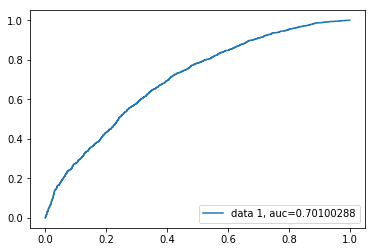

mass= 750
train mass   0.0    750.0
label              
0       4994      0
1          0   5006
test mass    0     750
label            
0      2521     0
1         0  2479
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 36.6min finished


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=15, learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


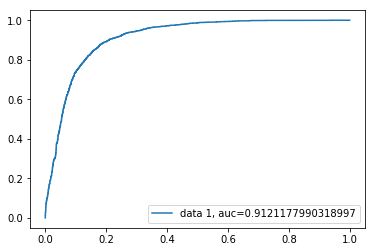

mass= 1000
train mass   0.0     1000.0
label                
0        5007       0
1           0    4993
test mass   0     1000
label            
0      2566     0
1         0  2434
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 36.7min finished


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=15, learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


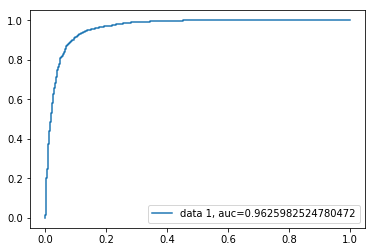

mass= 1250
train mass   0.0     1250.0
label                
0        4992       0
1           0    5008
test mass   0     1250
label            
0      2461     0
1         0  2539
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 36.3min finished


MLPClassifier(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=15, learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


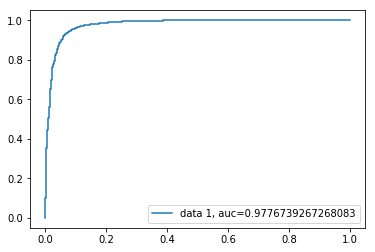

mass= 1500
train mass   0.0     1500.0
label                
0        5036       0
1           0    4964
test mass   0     1500
label            
0      2474     0
1         0  2526
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 35.4min finished


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=15, learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


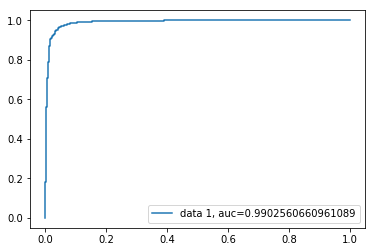

X_train_shape (10000, 11)
X_test_shape (5000, 11)


,tn,fp,fn,tp,acc,prec,recall,F1_score,kappa_cohen,auc
500,1584,916,849,1651,0.647,0.643163,0.6604,0.651668,0.294,0.701003
750,2066,455,309,2170,0.8472,0.826667,0.875353,0.850313,0.694528,0.912118
1000,2291,275,188,2246,0.9074,0.890916,0.922761,0.906559,0.814841,0.962598
1250,2258,203,133,2406,0.9328,0.922192,0.947617,0.934732,0.865509,0.977674
1500,2360,114,90,2436,0.9592,0.955294,0.964371,0.959811,0.918383,0.990256


<Figure size 432x288 with 0 Axes>

In [12]:
#Metric df: 
df_metrics =  pd.DataFrame(index=[500,750,1000,1250,1500], columns=["tn", "fp", "fn", "tp", "acc", "prec","recall","F1_score","kappa_cohen","auc"])



for i in (500,750,1000,1250,1500):

    print('mass=', i )

    #train
      #0 same size of dfmass1000 #TENER EN CUENTA QUE AQUI QUE LA DE 0 SEA MAYOR SIZE ES CASUALIDAD
    #EN OTRO PICKE PODRIA SER AL REVES, ESTO SE DEBERIA DE ARREGLAR
    np.random.seed(1)
    #dfmass0['mass'] = np.random.choice([500,750,1000,1250,1500], dfmass0.shape[0])#las cambio para queno sean 0 porque entonces sabría el label
    dfmass1000=df.loc[df['mass'] ==i]        
    dfmass0=df.loc[df['mass'] == 0].sample(random_state=1,n=dfmass1000.shape[0])   #cojo todos!!!!!!!!!!!!!! 
    dfmass1000=pd.concat([dfmass1000, dfmass0]).sample(random_state=1,frac=1).reset_index(drop=True)    #concatenating and shuffling
    dfmass1000['mass']=dfmass1000['mass'].astype(float)
    dfmass1000=dfmass1000.sample(random_state=1,n=2000*5)
    print("train", pd.crosstab(dfmass1000['label'],dfmass1000['mass']))
    dfmass1000=dfmass1000.drop('mass', axis=1)        #la masa es una caracterísitca
    
    
    #test
    dfmass1000test=df_originaltest.loc[df_originaltest['mass'] == i]
    dfmass0test=df_originaltest.loc[df_originaltest['mass'] == 0].sample(random_state=1,n=dfmass1000test.shape[0])
    dfmass1000test=pd.concat([dfmass1000test, dfmass0test]).sample(frac=1).reset_index(drop=True)
    dfmass1000test=dfmass1000test.sample(random_state=1,n=1000*5)

    print("test", pd.crosstab(dfmass1000test['label'],dfmass1000test['mass']))  
    
    dfmass1000test=dfmass1000test.drop('mass', axis=1)  
    
    drop=['lep_eta', 'lep_phi',  'met_phi', 'jets_no', 'jet1_eta', 'jet1_phi', 'jet1_btag', 
       'jet2_eta', 'jet2_phi', 'jet2_btag',  'jet3_eta', 'jet3_phi',
       'jet3_btag', 'jet4_eta', 'jet4_phi', 'jet4_btag']

    X_train=dfmass1000.drop(['label'], axis=1)
    X_train=X_train.drop(drop, axis=1)
    y_train=dfmass1000.label
    
    X_test=dfmass1000test.drop(['label'], axis=1)
    X_test=X_test.drop(drop, axis=1)
    y_test=dfmass1000test.label
        
   # print(X_train)
   # print(y_test)

    grid,best_model,y_pred,y_pred_proba = model(X_train,y_train,X_test)
    print(best_model)

#Roc curve construction

    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    #plt.savefig(cwd2+'MASS=' + str(i) + 'ROC.png')
    plt.show()
    plt.clf() 

#METRICS 

    tn, fp, fn, tp, acc, prec,recall, F1_score,kappa_cohen=Scores(y_test,y_pred)

    df_metrics.tn[i]=tn
    df_metrics.fp[i]=fp
    df_metrics.fn[i]=fn
    df_metrics.tp[i]=tp
    df_metrics.acc[i]=acc
    df_metrics.prec[i]=prec
    df_metrics.recall[i]=recall
    df_metrics.F1_score[i]=F1_score
    df_metrics.kappa_cohen[i]=kappa_cohen
    df_metrics.auc[i]=auc


print("X_train_shape",X_train.shape)
print("X_test_shape",X_test.shape)


display(df_metrics)

In [13]:
df_metrics.to_pickle('g2_redu')

In [ ]:
print(X_train.shape)
print(X_test.shape)
y_test.value_counts()

In [ ]:


fig, ax = plt.subplots()
ax.plot(["500","750","1000","1250","1500"], df_metrics["acc"], label="accuracy")
ax.plot(["500","750","1000","1250","1500"], df_metrics["F1_score"], label="F1_score")
ax.plot(["500","750","1000","1250","1500"], df_metrics["kappa_cohen"], label="kappa")

ax.set_xlabel('mass')
ax.set_ylabel('Metric')
legend = ax.legend(fontsize='x-large')
plt.show()
#plt.savefig(cwd+ 'metrics_comparation.png')

# REDUCIDO PARA COMPARAR CON SVM

# Comparativa modelos clásicos 

In [9]:
lr=[0.617727,0.838647,0.905506,0.936106,0.955204]
RF=[0.678,0.853,0.914,0.942,0.960]
rn1=[0.679,0.855,0.915944,0.942561,0.960839]
rn2=[0.651 ,0.850,0.906,0.935 ,0.959]
deepl=[0.698,0.866]
SVM=[0.624,0.837,0.899,0.932 ,0.959 ]


prec=[0.649,0.829,0.904,0.932,0.951]
recall=[0.713,0.883,0.927,0.951,0.966]
f1=[0.679,0.855,0.915944,0.942561,0.960839]

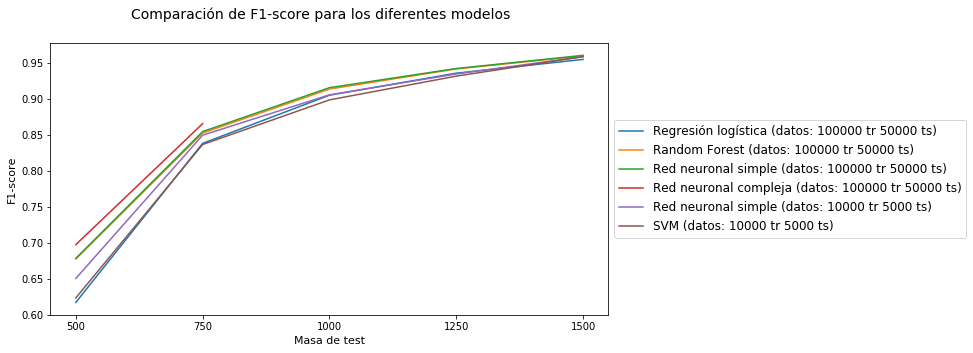

In [10]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(["500","750","1000","1250","1500"], lr, label="Regresión logística (datos: 100000 tr 50000 ts)")
ax.plot(["500","750","1000","1250","1500"], RF, label="Random Forest (datos: 100000 tr 50000 ts)")
ax.plot(["500","750","1000","1250","1500"], rn1, label="Red neuronal simple (datos: 100000 tr 50000 ts)")
ax.plot(["500","750"], deepl, label="Red neuronal compleja (datos: 100000 tr 50000 ts)")
ax.plot(["500","750","1000","1250","1500"], rn2, label="Red neuronal simple (datos: 10000 tr 5000 ts)")
ax.plot(["500","750","1000","1250","1500"], SVM, label="SVM (datos: 10000 tr 5000 ts)")



ax.set_xlabel('Masa de test', fontsize=11)
ax.set_ylabel('F1-score', fontsize=11)
ax.legend(fontsize='large',loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle('Comparación de F1-score para los diferentes modelos' , fontsize=14)
plt.show()

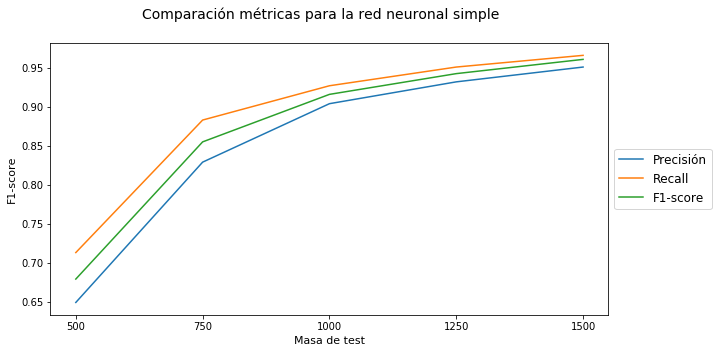

In [11]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(["500","750","1000","1250","1500"], prec, label="Precisión")
ax.plot(["500","750","1000","1250","1500"], recall, label="Recall")
ax.plot(["500","750","1000","1250","1500"], f1, label="F1-score")


ax.set_xlabel('Masa de test', fontsize=11)
ax.set_ylabel('F1-score', fontsize=11)
ax.legend(fontsize='large',loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle('Comparación métricas para la red neuronal simple' , fontsize=14)
plt.show()